## Code For Separating and Plotting Activity Sequences of Different Forest Service Projects Completed in Boise National Forest

### AUTHOR: Katie Murenbeeld
### DATE: 11 July 2019
### UPDATED: 

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [2]:
# Set up your data directories
mod_data_dir = '/Users/kathrynmurenbeeld/CODING/FOREST-TREATMENTS/DATA/FOREST-TREATMENTS/MOD/'

In [3]:
# Read in the csv and check data
df = pd.read_csv(mod_data_dir + 'TH_ID_ALL.csv').reset_index()
df.head(5)

,index,Unnamed: 0,ADMIN_FORE,ADMIN_REGI,ADMIN_FO_1,PROCLAIMED,ADMIN_DIST,ADMIN_DI_1,HOME_ORG,ACTIVITY_U,...,UK,EDW_INSERT,ETL_MODIFI,REV_DATE,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,SerDatesPlan,SerDatesAccom,SerDatesComp
0,0,3,12,4,Payette National Forest,412,New Meadows Ranger District,3,41203,41203,...,NaN,2018-06-25,2018-06-25,2009-03-23,34.187,0.000016,0.023130,1969-09-01,1969-09-01,1969-09-01
1,1,4,12,4,Payette National Forest,412,New Meadows Ranger District,3,41203,41203,...,NaN,2018-06-25,2018-06-25,2009-03-23,34.187,0.000016,0.023130,1985-09-01,1985-09-01,1985-09-01
2,2,20,12,4,Payette National Forest,412,Council Ranger District,1,41201,41201,...,NaN,2018-06-25,2018-06-25,2009-03-23,20.310,0.000009,0.026853,1977-08-01,1977-08-01,1977-08-01
3,3,33,17,1,Nez Perce - Clearwater National Forest,117,Slate Creek Ranger District,3,11701,11703,...,NaN,2018-06-25,2018-06-25,NaN,43.607,0.000020,0.022109,1981-09-01,1981-09-01,1981-09-01
4,4,56,5,1,NaN,105,North Fork Ranger District,3,11753,10503,...,NaN,2018-06-25,2018-06-25,NaN,20.703,0.000010,0.019169,1963-10-01,1963-10-01,1963-10-01


In [5]:
# Reduce the dataset by selecting the relevant columns
df1 = df[['ADMIN_FO_1','NEPA_PROJE','NEPA_DOC_N','IMPLEMENTA','LAND_SUITA','ACTIVITY_2','ACTIVITY_N','NBR_UNITS1','SerDatesPlan','SerDatesAccom','SerDatesComp']]
# Create a new variable/dataframe with only data from Boise National Forest
bnf = df1.loc[df1['ADMIN_FO_1'] == 'Boise National Forest'].copy()
bnf.head(5)

,ADMIN_FO_1,NEPA_PROJE,NEPA_DOC_N,IMPLEMENTA,LAND_SUITA,ACTIVITY_2,ACTIVITY_N,NBR_UNITS1,SerDatesPlan,SerDatesAccom,SerDatesComp
18,Boise National Forest,2731,(PALS)SIXSHOOTER PROJECT,NaN,500,4220,Commercial Thin,11.0,2009-09-30,2009-09-30,NaN
60,Boise National Forest,2778,(PALS)WHITE FLAT RESOURCE MANAGEMENT PROJECT,"RESILIENCY,MTN HOME WHITE FLAT KV",600,4220,Commercial Thin,25.0,2011-10-03,2012-02-21,NaN
89,Boise National Forest,06200301,NORTH KENNEDY-COTTONWOOD TS,NaN,500,4220,Commercial Thin,48.0,2001-01-14,2004-01-14,2007-09-15
109,Boise National Forest,22445,(PALS)MIDDLE FORK SALVAGE DECISION NOTICE,NaN,500,4231,"Salvage Cut (intermediate treatment, not regen...",180.0,2008-07-15,2008-08-20,2008-10-24
230,Boise National Forest,06200301,NORTH KENNEDY-COTTONWOOD TS,NaN,500,4220,Commercial Thin,12.0,2005-08-15,2005-10-15,NaN


In [10]:
# Create a list to reference the unique NEPA project names for Boise National Forest
UniqueNames = bnf.NEPA_DOC_N.unique()
UniqueNames

array(['(PALS)SIXSHOOTER PROJECT',
       '(PALS)WHITE FLAT RESOURCE MANAGEMENT PROJECT',
       'NORTH KENNEDY-COTTONWOOD TS',
       '(PALS)MIDDLE FORK SALVAGE DECISION NOTICE',
       'WILLIAMS CREEK SUMMER HOMES FUELS REDUCTION PROJECT',
       'DEFAULT FOR NOT REQUIRED',
       'WHISKEY CAMPO RESOURCE MANAGEMENT PROJECT',
       '(PALS)WEST MOUNTAIN NORTH RECORD OF DECISION', 'MESA PROJECT',
       '(PALS)SCRIVER CREEK INTEGRATED RESTORATION PROJECT',
       '(PALS)AIRLINE VEGETATION MANAGEMENT PROJECT',
       'ATLANTA SOUTH FUELS REDUCTION PROJECT',
       '(PALS)LITTLE OPHIR HAZARDOUS FUELS REDUCTION PROJECT DECISION NOTICE & FONSI',
       '(PALS)ROCK CREEK RESOURCE MANAGEMENT PROJECT',
       '(PALS)UPPER MIDDLE FORK PAYETTE RIVER DECISION NOTICE AND FONSI',
       '(PALS)ROADSIDE HAZARD TREE REMOVAL DECISION NOTICE &FONSI',
       'AIRLINE PROJECT', 'SIXSHOOTER PROJECT',
       'HOLLYWOOD SANITATION PROJECT',
       '(PALS)MORES SOUTH FUEL REDUCTION PROJECT, DECISION NOTICE 

In [25]:
# Define a function to separate the dataset by the NEPA project name.
# This function will return the area treated by activity name and activity code

def projectdf(projname):
    test = bnf.loc[bnf['NEPA_DOC_N']== (projname)].copy()
    print(projname)
    print(test.groupby('ACTIVITY_N')['NBR_UNITS1'].sum())
    print(test.groupby('ACTIVITY_2')['NBR_UNITS1'].sum())
    return test

# Define a function to plot the timing of the top three (by area treated) activities completed  
# in the NEPA project.

def plotNEPA(project,activity1=(),activity2=(),activity3=()):
    data1 = project.dropna(subset=['SerDatesComp']).loc[project['ACTIVITY_2'] == activity1].copy()
    xy1 = data1.groupby('SerDatesComp')['NBR_UNITS1'].sum().reset_index()
    x1 = xy1['SerDatesComp'].values
    y1 = xy1['NBR_UNITS1'].values
    
    data2 = project.dropna().loc[project['ACTIVITY_2'] == activity2].copy()
    xy2 = data2.groupby('SerDatesComp')['NBR_UNITS1'].sum().reset_index()
    x2 = xy2['SerDatesComp'].values
    y2 = xy2['NBR_UNITS1'].values
    
    data3 = project.dropna().loc[project['ACTIVITY_2'] == activity3].copy()
    xy3 = data3.groupby('SerDatesComp')['NBR_UNITS1'].sum().reset_index()
    x3 = xy3['SerDatesComp'].values
    y3 = xy3['NBR_UNITS1'].values
    
    plt.scatter(x1, y1)
    plt.scatter(x2, y2)
    plt.scatter(x3, y3)
    plt.title('Test')
    plt.xlabel('Date Completed')
    plt.ylabel('Area Treated')
    # extra plot specifics: title, x and y axis labels, etc.
    plt.show()
    return ([x1,y1],[x2,y2],[x3,y3])

In [26]:
# Create a new variable and run the function for the project of interest
# This will create the variable that will go in the 'project' argument in the plotNEPA function

WFRMP = projectdf('(PALS)WHITE FLAT RESOURCE MANAGEMENT PROJECT')

(PALS)WHITE FLAT RESOURCE MANAGEMENT PROJECT
ACTIVITY_N
Commercial Thin    1338.0
Name: NBR_UNITS1, dtype: float64
ACTIVITY_2
4220    1338.0
Name: NBR_UNITS1, dtype: float64


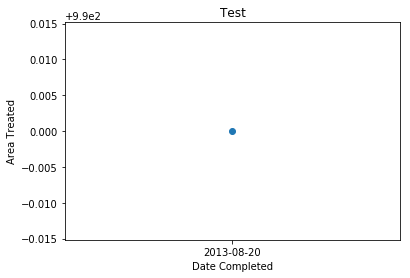

([array(['2013-08-20'], dtype=object), array([990.])],
 [array([], dtype=object), array([], dtype=float64)],
 [array([], dtype=object), array([], dtype=float64)])

In [27]:
# Plot the Project Data

plotNEPA(WFRMP, 4220)

### Now go for it for the other projects!

In [30]:
YPBD = projectdf('(PALS)YELLOW PINE BLOWDOWN')
YPBD

(PALS)YELLOW PINE BLOWDOWN
ACTIVITY_N
Salvage Cut (intermediate treatment, not regeneration)    216.0
Name: NBR_UNITS1, dtype: float64
ACTIVITY_2
4231    216.0
Name: NBR_UNITS1, dtype: float64


,ADMIN_FO_1,NEPA_PROJE,NEPA_DOC_N,IMPLEMENTA,LAND_SUITA,ACTIVITY_2,ACTIVITY_N,NBR_UNITS1,SerDatesPlan,SerDatesAccom,SerDatesComp
22425,Boise National Forest,51724,(PALS)YELLOW PINE BLOWDOWN,RESILIENCY,500,4231,"Salvage Cut (intermediate treatment, not regen...",41.0,2017-05-01,2017-06-16,NaN
44181,Boise National Forest,51724,(PALS)YELLOW PINE BLOWDOWN,RESILIENCY,500,4231,"Salvage Cut (intermediate treatment, not regen...",31.0,2017-05-01,2017-06-16,2017-09-08
73509,Boise National Forest,51724,(PALS)YELLOW PINE BLOWDOWN,RESILIENCY,500,4231,"Salvage Cut (intermediate treatment, not regen...",41.0,2017-05-01,2017-06-16,NaN
95265,Boise National Forest,51724,(PALS)YELLOW PINE BLOWDOWN,RESILIENCY,500,4231,"Salvage Cut (intermediate treatment, not regen...",31.0,2017-05-01,2017-06-16,2017-09-08
124593,Boise National Forest,51724,(PALS)YELLOW PINE BLOWDOWN,RESILIENCY,500,4231,"Salvage Cut (intermediate treatment, not regen...",41.0,2017-05-01,2017-06-16,NaN
146349,Boise National Forest,51724,(PALS)YELLOW PINE BLOWDOWN,RESILIENCY,500,4231,"Salvage Cut (intermediate treatment, not regen...",31.0,2017-05-01,2017-06-16,2017-09-08


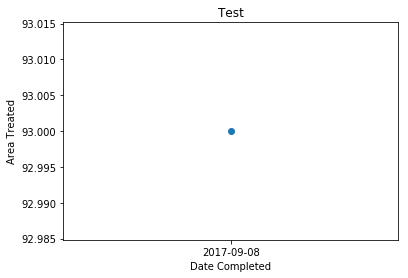

([array(['2017-09-08'], dtype=object), array([93.])],
 [array([], dtype=object), array([], dtype=float64)],
 [array([], dtype=object), array([], dtype=float64)])

In [29]:
plotNEPA(YPBD, 4231)

In [38]:
NFP = projectdf('NORTH FORK PAYETTE')

NORTH FORK PAYETTE
ACTIVITY_N
Commercial Thin    1200.0
Name: NBR_UNITS1, dtype: float64
ACTIVITY_2
4220    1200.0
Name: NBR_UNITS1, dtype: float64


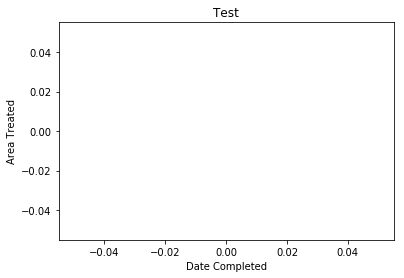

([array([], dtype=object), array([], dtype=float64)],
 [array([], dtype=object), array([], dtype=float64)],
 [array([], dtype=object), array([], dtype=float64)])

In [39]:
plotNEPA(NFP, 4220)

In [40]:
WMNRoD = projectdf('(PALS)WEST MOUNTAIN NORTH RECORD OF DECISION')

(PALS)WEST MOUNTAIN NORTH RECORD OF DECISION
ACTIVITY_N
Commercial Thin                                                            246.0
Improvement Cut                                                            798.0
Overstory Removal Cut (from advanced regeneration) (EA/RH/FH)                0.0
Sanitation Cut                                                              45.0
Shelterwood Establishment Cut (with or without leave trees) (EA/RH/NFH)    822.0
Shelterwood Preparatory Cut (EA/NRH/NFH)                                   180.0
Shelterwood Removal Cut (w/ leave trees) (EA/NRH/FH)                       135.0
Single-tree Selection Cut (UA/RH/FH)                                        78.0
Name: NBR_UNITS1, dtype: float64
ACTIVITY_2
4121    180.0
4131    822.0
4143      0.0
4145    135.0
4151     78.0
4210    798.0
4220    246.0
4232     45.0
Name: NBR_UNITS1, dtype: float64


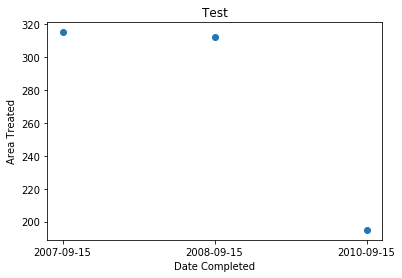

([array(['2007-09-15', '2008-09-15', '2010-09-15'], dtype=object),
  array([315., 312., 195.])],
 [array([], dtype=object), array([], dtype=float64)],
 [array([], dtype=object), array([], dtype=float64)])

In [41]:
plotNEPA(WMNRoD, 4131, 4210, 4220)

In [42]:
MFSDN = projectdf('(PALS)MIDDLE FORK SALVAGE DECISION NOTICE')

(PALS)MIDDLE FORK SALVAGE DECISION NOTICE
ACTIVITY_N
Salvage Cut (intermediate treatment, not regeneration)    687.0
Sanitation Cut                                            348.0
Name: NBR_UNITS1, dtype: float64
ACTIVITY_2
4231    687.0
4232    348.0
Name: NBR_UNITS1, dtype: float64


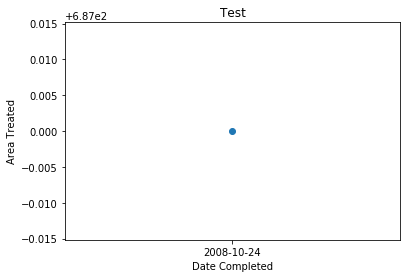

([array(['2008-10-24'], dtype=object), array([687.])],
 [array([], dtype=object), array([], dtype=float64)],
 [array([], dtype=object), array([], dtype=float64)])

In [43]:
plotNEPA(MFSDN, 4231, 4232)